In [3]:
# !pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4359 sha256=d166a01c847c1b3c55ff8860d2794717f5f6cce88ae46948b597cf64a9ee7ff4
  Stored in directory: c:\users\playdata\appdata\local\pip\cache\wheels\66\4e\88\6de23ce74be839a953498c4ebdfa809ad7da9422ac89ae856c
Successfully built selectivesearch


In [59]:
import skimage.data
import selectivesearch
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [30]:
img = skimage.data.astronaut()

In [31]:
img.shape

(512, 512, 3)

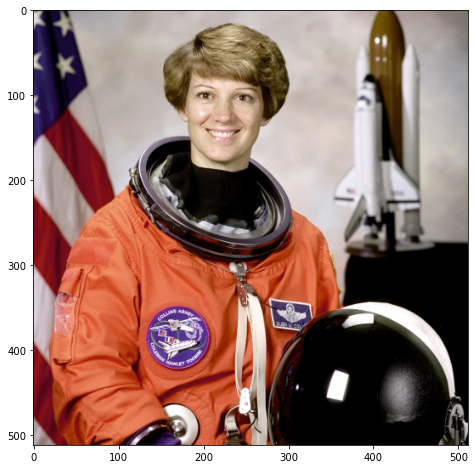

In [32]:
plt.figure(figsize=(8,8))
plt.imshow(img)

In [39]:
img_lbl, regions = selectivesearch.selective_search(img, scale=500, sigma=0.9, min_size=1000)

In [40]:
print(type(img_lbl))
print(img_lbl.shape)
print(type(regions))
print(len(regions))

<class 'numpy.ndarray'>
(512, 512, 4)
<class 'list'>
62


In [41]:
regions[:5]

[{'rect': (0, 0, 61, 155), 'size': 6349, 'labels': [0.0]},
 {'rect': (10, 0, 109, 227), 'size': 2098, 'labels': [1.0]},
 {'rect': (46, 0, 362, 326), 'size': 45561, 'labels': [2.0]},
 {'rect': (393, 0, 42, 187), 'size': 5547, 'labels': [3.0]},
 {'rect': (423, 0, 88, 269), 'size': 15778, 'labels': [4.0]}]

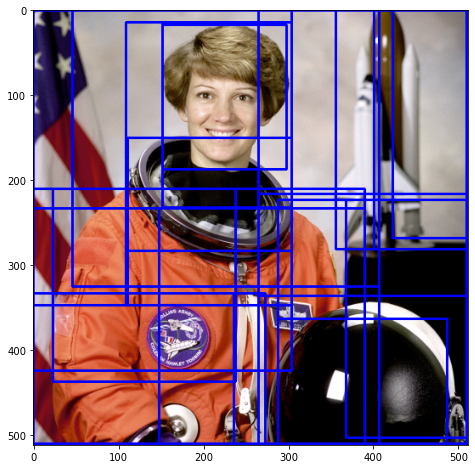

In [79]:
dst = img.copy()

cand_rect = [cand['rect'] for cand in regions if cand['size'] > 10000]

# for rect in cand_rect:
#     x1 = rect[0]
#     y1 = rect[1]
#     x2 = rect[2] + x1
#     y2 = rect[3] + y1
#     cv2.rectangle(dst, (x1, y1), (x2, y2), color=[0, 0, 255], thickness=2)

for rect in cand_rect:
    cv2.rectangle(dst, rect, (0, 0, 255), 2)
    
plt.figure(figsize=(8, 8))
plt.imshow(dst)

## IOU

In [80]:
def compute_iou(cand_box, gt_box): # cand_box: 예측 박스, gt_box : ground truth box(정답 박스)
    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    iou = intersection / union
    return iou

index : 28 iou : 0.7175472928897586


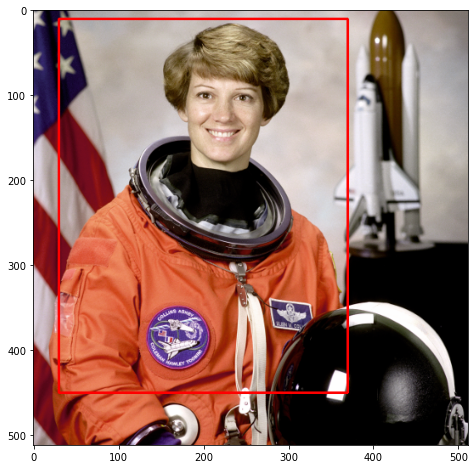

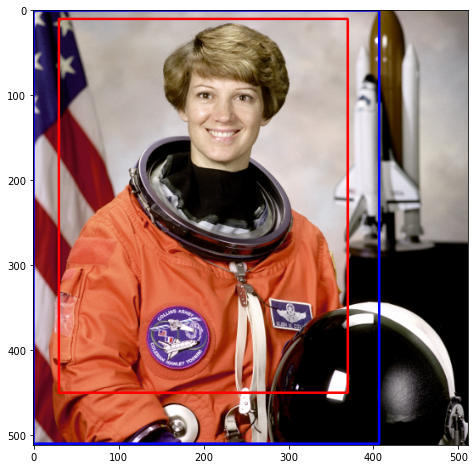

In [81]:
gt_box = [30, 10, 370, 450]
dst = img.copy()
cv2.rectangle(dst, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), (255, 0, 0), 2)
plt.figure(figsize=(8, 8))
plt.imshow(dst)

cand_rect = [cand['rect'] for cand in regions if cand['size'] > 10000]

for i, cand_box in enumerate(cand_rect):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)

    if iou > 0.7:
        print("index :" ,i, "iou :", iou)
        cv2.rectangle(dst, cand_box, (0, 0, 255), 2)
#         cv2.rectangle(dst, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), (0, 255, 0), 2)
        
plt.figure(figsize=(8, 8))
plt.imshow(dst)